In [1]:
from PINN_model import PINN
import utils.helper_functions_PINN as hf_PINN
import utils.helper_functions as hf
import utils.fun as fun
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
from PINN_model import PINN

N_colloc = 21
filename = 'in_silico_dataset.csv'
hidden_layers = [128, 128, 128]

pinn = PINN(N_colloc, filename, hidden_layers)
pinn.create_model()
pinn.pre_training(epochs=40, lr=1e-3, data_loss_batch=64)
pinn.training(epochs=25, lr=5e-4, ode_loss_batch=10, bc_loss_batch=32, balancing_scheme='inverse_dirichlet', alpha=0.5, tau=5)


DNN model created succesfully. Structure:  [4, 128, 128, 128, 23] 

Start of DNN model training.
[DNN] Epoch 00001/00040, Loss: 1.445653e-02, LR: 1.0e-03
[DNN] Epoch 00002/00040, Loss: 1.956434e-03, LR: 1.0e-03
[DNN] Epoch 00003/00040, Loss: 8.948320e-04, LR: 1.0e-03
[DNN] Epoch 00004/00040, Loss: 6.473882e-04, LR: 1.0e-03
[DNN] Epoch 00005/00040, Loss: 4.650872e-04, LR: 1.0e-03
[DNN] Epoch 00006/00040, Loss: 3.422116e-04, LR: 1.0e-03
[DNN] Epoch 00007/00040, Loss: 2.590564e-04, LR: 1.0e-03
[DNN] Epoch 00008/00040, Loss: 2.179443e-04, LR: 1.0e-03
[DNN] Epoch 00009/00040, Loss: 2.027345e-04, LR: 1.0e-03
[DNN] Epoch 00010/00040, Loss: 1.682211e-04, LR: 1.0e-03
[DNN] Epoch 00011/00040, Loss: 1.595497e-04, LR: 1.0e-03
[DNN] Epoch 00012/00040, Loss: 1.488827e-04, LR: 1.0e-03
[DNN] Epoch 00013/00040, Loss: 1.407468e-04, LR: 1.0e-03
[DNN] Epoch 00014/00040, Loss: 1.238515e-04, LR: 1.0e-03
[DNN] Epoch 00015/00040, Loss: 1.386400e-04, LR: 1.0e-03
[DNN] Epoch 00016/00040, Loss: 1.053707e-04, LR

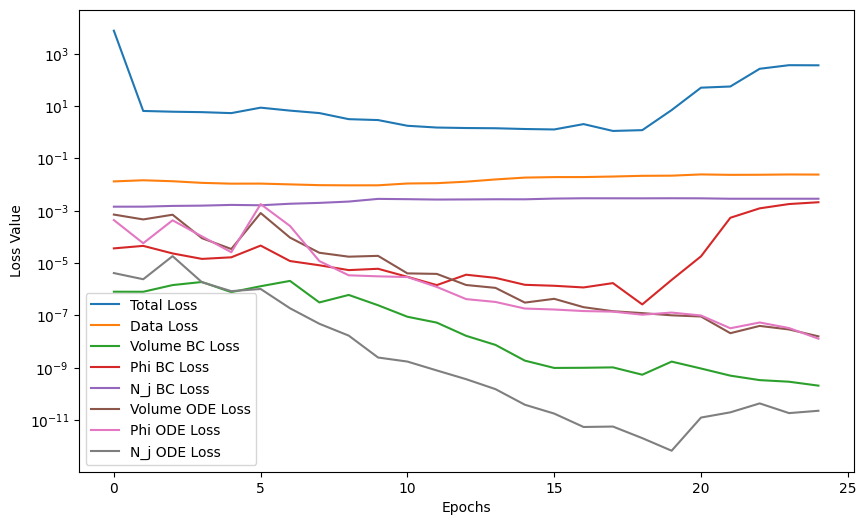

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
loss_vector = np.array(pinn.losses_vector)
plt.plot(loss_vector[:, 0], label='Total Loss')
plt.plot(loss_vector[:, 1], label='Data Loss')
plt.plot(loss_vector[:, 2], label='Volume BC Loss')
plt.plot(loss_vector[:, 3], label='Phi BC Loss')
plt.plot(loss_vector[:, 4], label='N_j BC Loss')
plt.plot(loss_vector[:, 5], label='Volume ODE Loss')
plt.plot(loss_vector[:, 6], label='Phi ODE Loss')
plt.plot(loss_vector[:, 7], label='N_j ODE Loss')
plt.yscale('log')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.show()

In [4]:
import torch
torch.save(pinn.model.state_dict(), "PINN_inverse_dirichlet.pt")


In [5]:
N_colloc = 21
filename = 'in_silico_dataset.csv'
data_loss_batch = 32
hidden_layers = [128, 128, 128]

dnn = PINN(N_colloc, filename, hidden_layers)
dnn.create_model()

dnn.model.load_state_dict(torch.load("DNN.pt"))
dnn.model.eval()  # Set to evaluation mode


pinn = PINN(N_colloc, filename, hidden_layers)
pinn.create_model()

pinn.model.load_state_dict(torch.load("PINN_inverse_dirichlet.pt"))
pinn.model.eval()  # Set to evaluation mode


DNN model created succesfully. Structure:  [4, 128, 128, 128, 23] 



C:\Users\iagr9\AppData\Local\Temp\ipykernel_75056\1406332299.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dnn.model.load_state_dict(torch.load("DNN.pt"))



DNN model created succesfully. Structure:  [4, 128, 128, 128, 23] 



C:\Users\iagr9\AppData\Local\Temp\ipykernel_75056\1406332299.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pinn.model.load_state_dict(torch.load("PINN_inverse_dirichl

DNN(
  (net): Sequential(
    (layer0): Linear(in_features=4, out_features=128, bias=True)
    (tanh0): Tanh()
    (layer1): Linear(in_features=128, out_features=128, bias=True)
    (tanh1): Tanh()
    (layer2): Linear(in_features=128, out_features=128, bias=True)
    (tanh2): Tanh()
    (layer3): Linear(in_features=128, out_features=23, bias=True)
    (sigmoid): Sigmoid()
  )
)

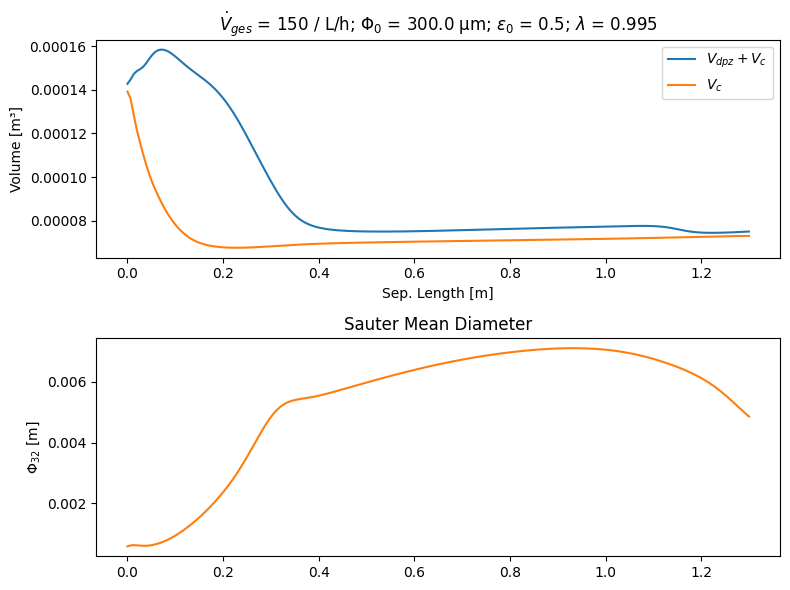

In [12]:
# vector x
dV_ges = 150
eps_0 = 0.5
phi_0 = 300e-6
_, _, d_j, _ = fun.initialize_boundary_conditions(eps_0, phi_0, 2.5*phi_0, 'Output', N_D=20, plot=False)


x_line = np.linspace(0.0, 1.3, 201)
Y_list = hf_PINN.predict_outputs_np(dnn.model, dV_ges=dV_ges, eps_0=eps_0, phi_0=phi_0, x=x_line, X_min=dnn.X_min, X_max=dnn.X_max, Y_min=dnn.Y_min, Y_max=dnn.Y_max)
Y_list = np.array(Y_list)


phi_32_x = Y_list[:,2]
V_c_x = Y_list[:,1]
V_dpz_x = Y_list[:,0] 
N_j = Y_list[:,3:] 
lam = hf.calc_efficiency(d_j, N_j)



fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))  # eine Zeile, zwei Spalten

# --- Subplot 1 ---
ax1.plot(x_line, V_c_x + V_dpz_x, label=r'$V_{dpz}+V_{c}$')
ax1.plot(x_line, V_c_x, label=r'$V_c$')
ax1.set_ylabel('Volume [m³]')
ax1.set_title(rf'$\dot{{V}}_{{ges}}$ = {dV_ges} / L/h; ' 
              rf'$\Phi_0$ = {1e6*phi_0} µm; ' 
              rf'$\epsilon_0$ = {eps_0}; '  
              rf'$\lambda$ = {lam:.3f}')
ax1.legend()

# --- Subplot 2 ---
ax2.plot(x_line, phi_32_x, color='tab:orange')
ax2.set_ylabel(r'$\Phi_{32}$ [m]')
ax1.set_xlabel('Sep. Length [m]')
ax2.set_title('Sauter Mean Diameter')

plt.tight_layout()
plt.show()

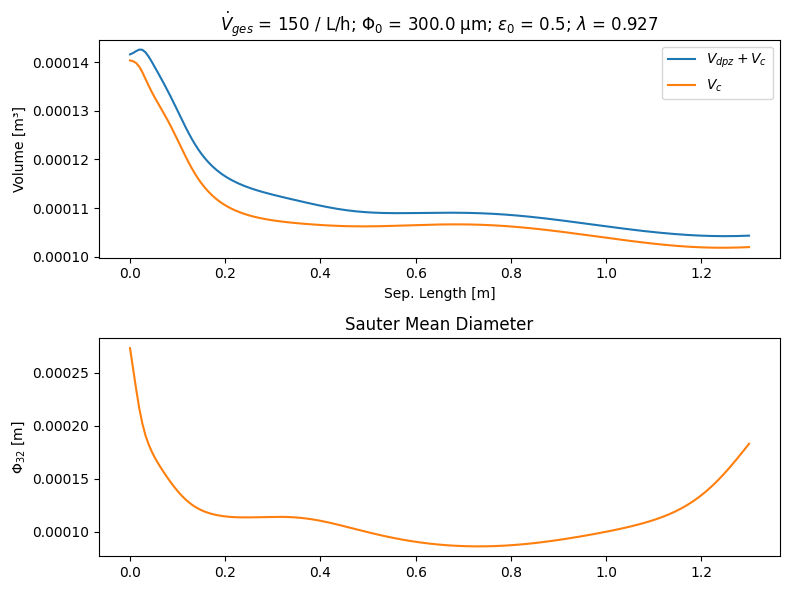

In [13]:
# vector x
dV_ges = 150
eps_0 = 0.5
phi_0 = 300e-6
_, _, d_j, _ = fun.initialize_boundary_conditions(eps_0, phi_0, 2.5*phi_0, 'Output', N_D=20, plot=False)


x_line = np.linspace(0.0, 1.3, 201)
Y_list = hf_PINN.predict_outputs_np(pinn.model, dV_ges=dV_ges, eps_0=eps_0, phi_0=phi_0, x=x_line, X_min=pinn.X_min, X_max=pinn.X_max, Y_min=pinn.Y_min, Y_max=pinn.Y_max)
Y_list = np.array(Y_list)

phi_32_x = Y_list[:,2]
V_c_x = Y_list[:,1]
V_dpz_x = Y_list[:,0] 
N_j = Y_list[:,3:] 
lam = hf.calc_efficiency(d_j, N_j)


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))  # eine Zeile, zwei Spalten

# --- Subplot 1 ---
ax1.plot(x_line, V_c_x + V_dpz_x, label=r'$V_{dpz}+V_{c}$')
ax1.plot(x_line, V_c_x, label=r'$V_c$')
ax1.set_ylabel('Volume [m³]')
ax1.set_title(rf'$\dot{{V}}_{{ges}}$ = {dV_ges} / L/h; ' 
              rf'$\Phi_0$ = {1e6*phi_0} µm; ' 
              rf'$\epsilon_0$ = {eps_0}; '  
              rf'$\lambda$ = {lam:.3f}')
ax1.legend()

# --- Subplot 2 ---
ax2.plot(x_line, phi_32_x, color='tab:orange')
ax2.set_ylabel(r'$\Phi_{32}$ [m]')
ax1.set_xlabel('Sep. Length [m]')
ax2.set_title('Sauter Mean Diameter')

plt.tight_layout()
plt.show()